In [1]:
import pandas as pd

In [2]:
sales = pd.read_csv(r'D:\Mitsu\MS-ISM\508 - Data Mining I\Week3\LaptopSales-1.csv')

In [3]:
sales.head(6)

,Configuration Index,RAM (GB),Processor Speeds (GHz),Integrated Wireless,HD Size (GB),Bundled Applications,Retail Price
0,290,1,1.5,Yes,40,No,287
1,208,2,1.5,No,300,No,329
2,292,1,1.5,Yes,80,No,315
3,342,2,1.5,Yes,120,No,357
4,304,1,1.5,No,300,No,357
5,347,2,1.5,No,80,Yes,364


In [4]:
sales.dtypes

Configuration Index         int64
RAM (GB)                    int64
Processor Speeds (GHz)    float64
Integrated Wireless        object
HD Size (GB)                int64
Bundled Applications       object
Retail Price                int64
dtype: object

In [5]:
sales.describe()

,Configuration Index,RAM (GB),Processor Speeds (GHz),HD Size (GB),Retail Price
count,25649.000000,25649.000000,25649.000000,25649.000000,25649.000000
mean,371.427424,2.194121,1.910168,131.352489,370.166595
std,225.426489,1.100078,0.410171,99.101622,68.489926
min,1.000000,1.000000,1.500000,40.000000,168.000000
25%,201.000000,1.000000,1.500000,40.000000,322.000000
50%,332.000000,2.000000,2.000000,80.000000,364.000000
75%,542.000000,2.000000,2.400000,120.000000,413.000000
max,864.000000,4.000000,2.400000,300.000000,623.000000


In [6]:
sales['Retail Price'].mean()

370.1665951888963

In [7]:
#Let us check if there are NaN values (missing values) in this dataset. All the columns return False value indicating
#that there are no missing values in this dataset.

sales.isnull().any()

Configuration Index       False
RAM (GB)                  False
Processor Speeds (GHz)    False
Integrated Wireless       False
HD Size (GB)              False
Bundled Applications      False
Retail Price              False
dtype: bool

In [8]:
#Correlation and heatmap

corr = sales.corr()
corr

C:\Users\Mitsu\AppData\Local\Temp\ipykernel_6140\3405582540.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = sales.corr()


,Configuration Index,RAM (GB),Processor Speeds (GHz),HD Size (GB),Retail Price
Configuration Index,1.000000,0.043779,0.042447,-0.103127,0.533884
RAM (GB),0.043779,1.000000,-0.048288,-0.084440,0.516761
Processor Speeds (GHz),0.042447,-0.048288,1.000000,-0.033960,0.204376
HD Size (GB),-0.103127,-0.084440,-0.033960,1.000000,0.321109
Retail Price,0.533884,0.516761,0.204376,0.321109,1.000000


In [9]:
import seaborn as sns

In [10]:
import matplotlib.pyplot as plt

Text(0.5, 1.0, 'Correlation HeatMap')

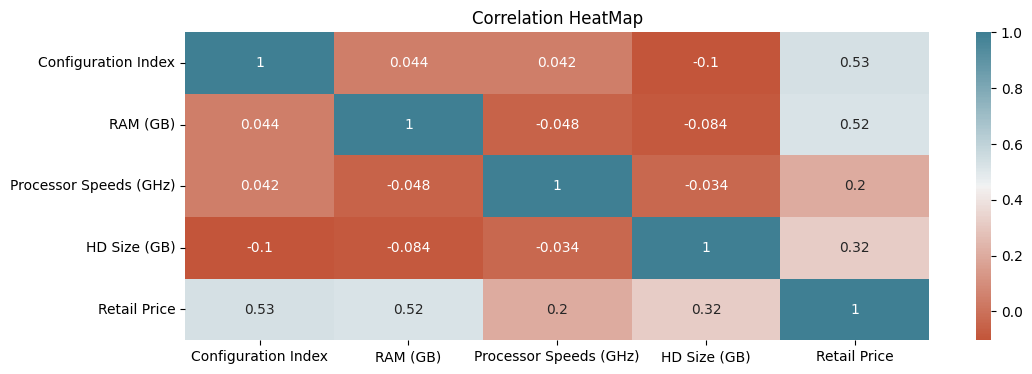

In [11]:
plt.figure(figsize=(12,4))
sns.heatmap(corr, annot=True, cmap=sns.diverging_palette(20, 220, n=200))
plt.title('Correlation HeatMap')            

In [12]:
#Next step is to divide the data into “attributes” and “labels”. X variable contains all the attributes/features and y
#variable contains the target variable

X = pd.get_dummies(sales[['Configuration Index', 'RAM (GB)', 'Processor Speeds (GHz)', 'Integrated Wireless', 'HD Size (GB)', 'Bundled Applications']], drop_first = True)
y = sales[['Retail Price']]

In [13]:
X

,Configuration Index,RAM (GB),Processor Speeds (GHz),HD Size (GB),Integrated Wireless_Yes,Bundled Applications_Yes
0,290,1,1.5,40,1,0
1,208,2,1.5,300,0,0
2,292,1,1.5,80,1,0
3,342,2,1.5,120,1,0
4,304,1,1.5,300,0,0
...,...,...,...,...,...,...
25644,479,1,2.4,300,0,1
25645,589,1,1.5,120,0,1
25646,731,1,1.5,80,0,1
25647,375,2,2.4,300,1,1


In [14]:
#Now we are going to split the data into training set and test set, We will use 80% of the data as the training set
#and the rest 20% of the data as test set.

from sklearn.model_selection import train_test_split

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [16]:
X_train.shape

(20519, 6)

In [17]:
#Now we are ready to train a linear regression model on the training set and estimate the coefficients

from sklearn.linear_model import LinearRegression

In [18]:
sales_regressor = LinearRegression()
sales_regressor.fit(X_train, y_train)
coeff_df = pd.DataFrame(sales_regressor.coef_, columns=X.columns)
coeff_df

#coeff is the beta in the equation

,Configuration Index,RAM (GB),Processor Speeds (GHz),HD Size (GB),Integrated Wireless_Yes,Bundled Applications_Yes
0,0.173125,34.974064,38.247655,0.304455,15.538897,35.992358


In [19]:
#pip install statsmodels

In [20]:
# statsmodels fits a line passing through the origin, it doesn't fit an intercept. Hence, you need to use the command 'ad
# statsmodels however provides a convenience function called add_constant that adds a constant column to input data set.

import statsmodels.api as sm

In [21]:
X_train2 = sm.add_constant(X_train)
est = sm.OLS(y_train, X_train2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:           Retail Price   R-squared:                       0.835
Model:                            OLS   Adj. R-squared:                  0.835
Method:                 Least Squares   F-statistic:                 1.731e+04
Date:                Fri, 03 Mar 2023   Prob (F-statistic):               0.00
Time:                        23:06:47   Log-Likelihood:                -97410.
No. Observations:               20519   AIC:                         1.948e+05
Df Residuals:                   20512   BIC:                         1.949e+05
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

In [22]:
# equation for output above
#90.6157 + 0.1731(Configuration Index) + 34.9741(RAM (GB)) + ... + 35.9924(Bundled Applications_Yes)

In [23]:
#Evaluate the linear regression model

y_train_pred = sales_regressor.predict(X_train)
y_test_pred = sales_regressor.predict(X_test)

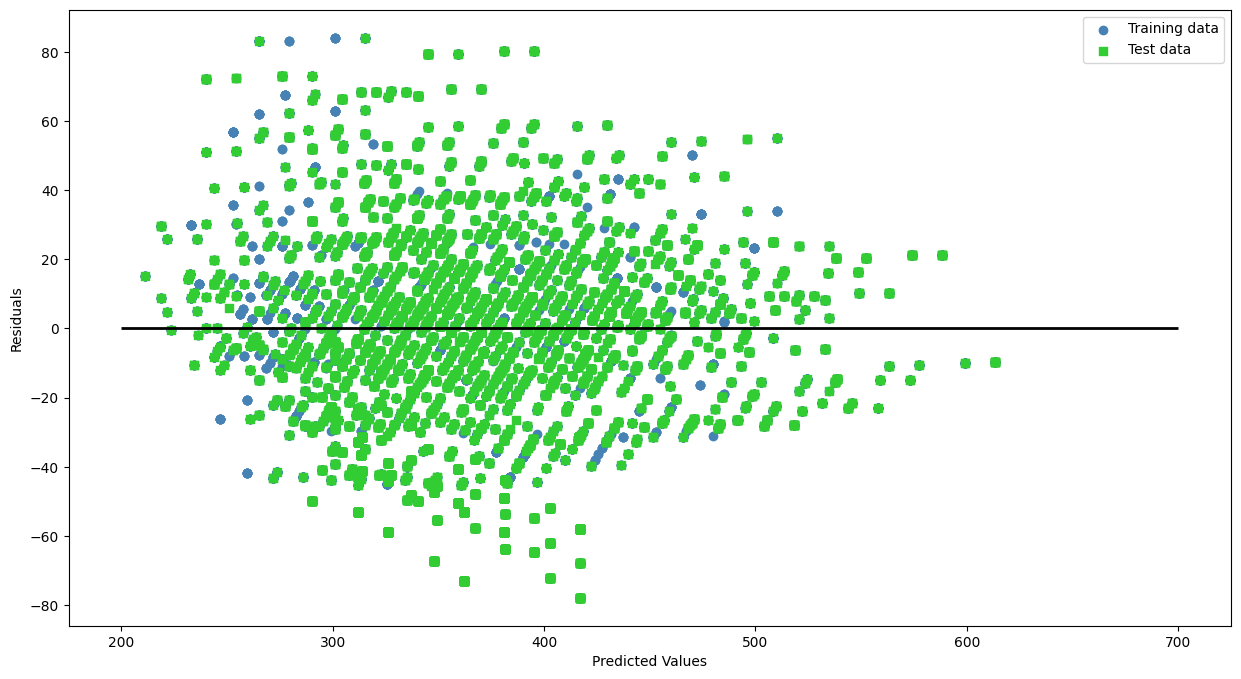

In [24]:
plt.figure(figsize = (15,8))
plt.scatter(y_train_pred, y_train_pred-y_train, c='steelblue', marker = 'o', label = "Training data")
plt.scatter(y_test_pred, y_test_pred-y_test, color = 'limegreen', marker = 's',label='Test data')
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.legend(loc = 'upper right')
plt.hlines(y = 0,xmin = 200, xmax = 700, color = 'black', lw =2)
plt.show()

In [25]:
# For regression algorithms, we can use three evaluation metrics to evalute model performance:
# 1. Mean Squared Error (MSE) is the mean of the squared errors
# 2. Mean Absolute Error (MAE) is the mean of the absolute value of the errors.
# 3. Root Mean Squared Error (RMSE) is the square root of the mean of the squared errors

In [26]:
from sklearn import metrics
import numpy as np

In [27]:
print('Mean Absolute Error on Test Data:', metrics.mean_absolute_error(y_test, y_test_pred))
print('Mean Absolute Error on Training Data:', metrics.mean_absolute_error(y_train, y_train_pred))
print('Mean Squared Error on Test Data:', metrics.mean_squared_error(y_test, y_test_pred))
print('Mean Squared Error on Training Data:', metrics.mean_squared_error(y_train, y_train_pred))
print('Root Mean Squared Error on Test Data:', np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)))
print('Root Mean Squared Error on Training Data:', np.sqrt(metrics.mean_squared_error(y_train, y_train_pred)))

Mean Absolute Error on Test Data: 21.59110673795884
Mean Absolute Error on Training Data: 21.760198848831326
Mean Squared Error on Test Data: 768.292442452124
Mean Squared Error on Training Data: 777.9861978009391
Root Mean Squared Error on Test Data: 27.718088722928282
Root Mean Squared Error on Training Data: 27.892403944460202


In [28]:
# the value of train and test data can never be same. if that is the case then something wrong is been done in the code

In [29]:
from sklearn.metrics import r2_score

In [30]:
r_sq_test = r2_score(y_test, y_test_pred)
r_sq_train = r2_score(y_train, y_train_pred)
print('R squared on test set:', r_sq_test)
print('R squared on training set:', r_sq_train)

R squared on test set: 0.8323889325785556
R squared on training set: 0.8350651328238885
